Importing the required libraries: 
GeoPandas for geospatial data, 
Matplotlib for plotting, 
Seaborn for statistical data visualization, 
Folium for creating interactive maps, 
and Shapely for working with geometric objects.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

loading the GeoJSON data from the specified file path into a GeoDataFrame "railway_gdf". 

In [22]:
# Load GeoJSON data into GeoDataFrame
railway_gdf = gpd.read_file("dataset\Railway.geojson")

The info() method is used to display basic information about the GeoDataFrame, 
such as the number of entries, column names, and data types.

In [23]:
print(railway_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            3361 non-null   object  
 1   @id                           3361 non-null   object  
 2   FIXME                         3 non-null      object  
 3   access                        2 non-null      object  
 4   alt_name                      22 non-null     object  
 5   branch                        499 non-null    object  
 6   bridge                        343 non-null    object  
 7   bridge:alt_name               1 non-null      object  
 8   bridge:name                   2 non-null      object  
 9   bridge:ref                    6 non-null      object  
 10  bridge_ref                    7 non-null      object  
 11  comment                       1 non-null      object  
 12  covered                       53 non-nul

Creating a plot to visualize the total coverage of the railway network. 
Matplotlib's plt.figure() sets the figure size, railway_gdf.plot() plots the GeoDataFrame on the current axis (ax=plt.gca()), and plt.show() displays the plot.

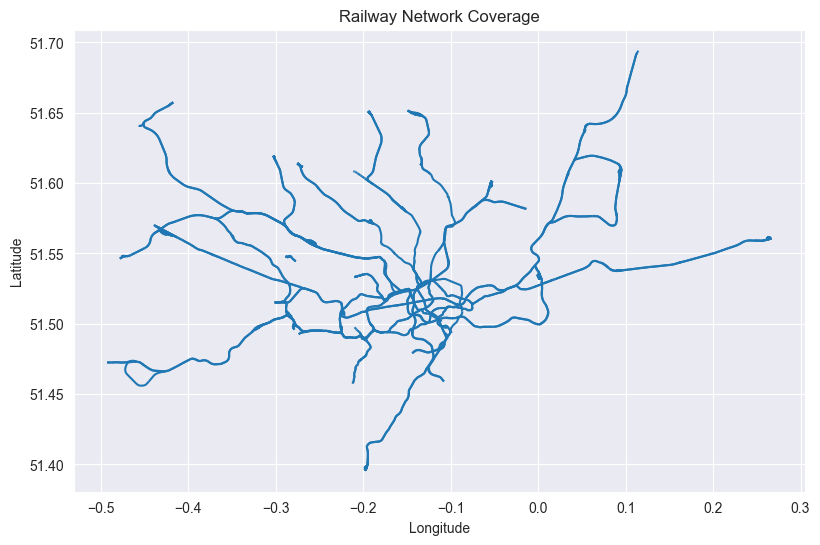

In [24]:
# Total coverage of the railway network
plt.figure(figsize=(10, 6))
railway_gdf.plot(ax=plt.gca())
plt.title("Railway Network Coverage")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Using Seaborn to create a count plot of the number of stations and stops. 
It visualizes the distribution of station/stop names, and sns.countplot() is employed for this purpose.

C:\Users\vishn\AppData\Local\Temp\ipykernel_12972\4259083394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='name', data=railway_gdf, palette='viridis', order=railway_gdf['name'].value_counts().index)


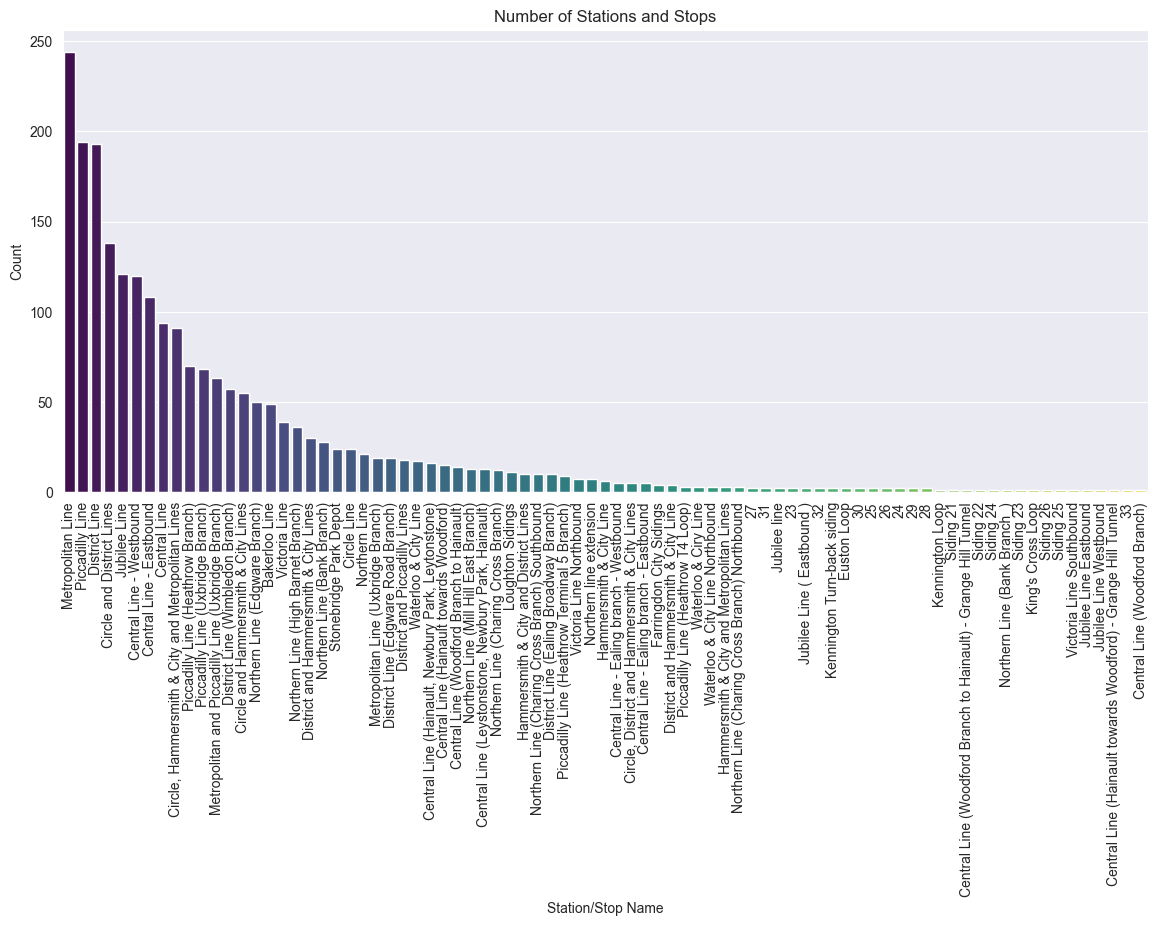

In [25]:
# Stations and Stops
plt.figure(figsize=(14, 6))
sns.countplot(x='name', data=railway_gdf, palette='viridis', order=railway_gdf['name'].value_counts().index)
plt.title("Number of Stations and Stops")
plt.xlabel("Station/Stop Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Visualizing the distribution of average speed using a histogram. 
Seaborn's sns.histplot() is employed, and dropna() is used to handle missing values.

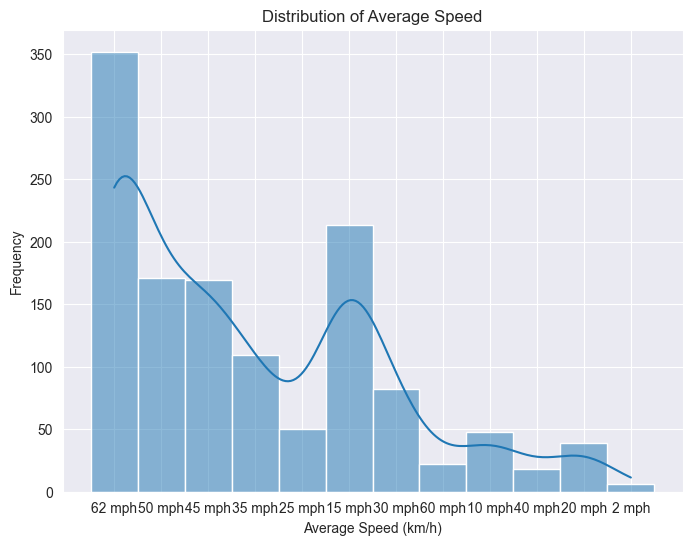

In [26]:
# Average Speed
plt.figure(figsize=(8, 6))
sns.histplot(railway_gdf['maxspeed'].dropna(), bins=20, kde=True)
plt.title("Distribution of Average Speed")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

Creating an interactive map using Folium. 
It adds PolyLines for each railway line, and a measure control for distance calculation is included. 

In [27]:
# Map with railway points
m = folium.Map(location=[51.5074, -0.1278], zoom_start=11)  # London coordinates

for index, row in railway_gdf.iterrows():
    line_coords = list(zip(row['geometry'].coords.xy[1], row['geometry'].coords.xy[0]))
    line = folium.PolyLine(locations=line_coords, color='blue', weight=2)
    m.add_child(line)

In [28]:
# Add a measure control to the map for distance calculation
plugins.MeasureControl(primary_length_unit='kilometers').add_to(m)

In [29]:
# Add railway station markers
'''
for index, row in railway_gdf.iterrows():
    for coord in zip(row['geometry'].coords.xy[1], row['geometry'].coords.xy[0]):
        folium.Marker(location=coord, popup=row['name']).add_to(m)
'''

"\nfor index, row in railway_gdf.iterrows():\n    for coord in zip(row['geometry'].coords.xy[1], row['geometry'].coords.xy[0]):\n        folium.Marker(location=coord, popup=row['name']).add_to(m)\n"

In [30]:
# Display the map
m

In [31]:
# Load GeoJSON data into GeoDataFrame
bus_stop_gdf = gpd.read_file("dataset\Bus_stop.geojson")

In [32]:
# Display basic information about the GeoDataFrame
print(bus_stop_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19935 entries, 0 to 19934
Columns: 156 entries, id to geometry
dtypes: geometry(1), object(155)
memory usage: 23.7+ MB
None


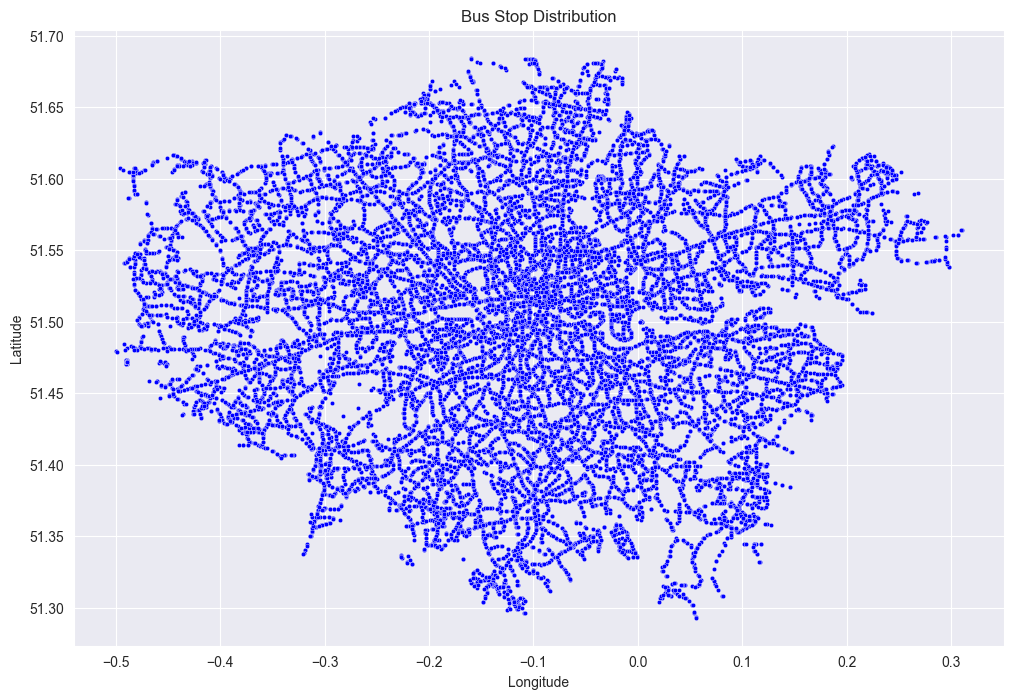

In [33]:
# Scatter plot of bus stop distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(x=bus_stop_gdf['geometry'].x, y=bus_stop_gdf['geometry'].y, s=10, color='blue')
plt.title("Bus Stop Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

C:\Users\vishn\AppData\Local\Temp\ipykernel_12972\1211025948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


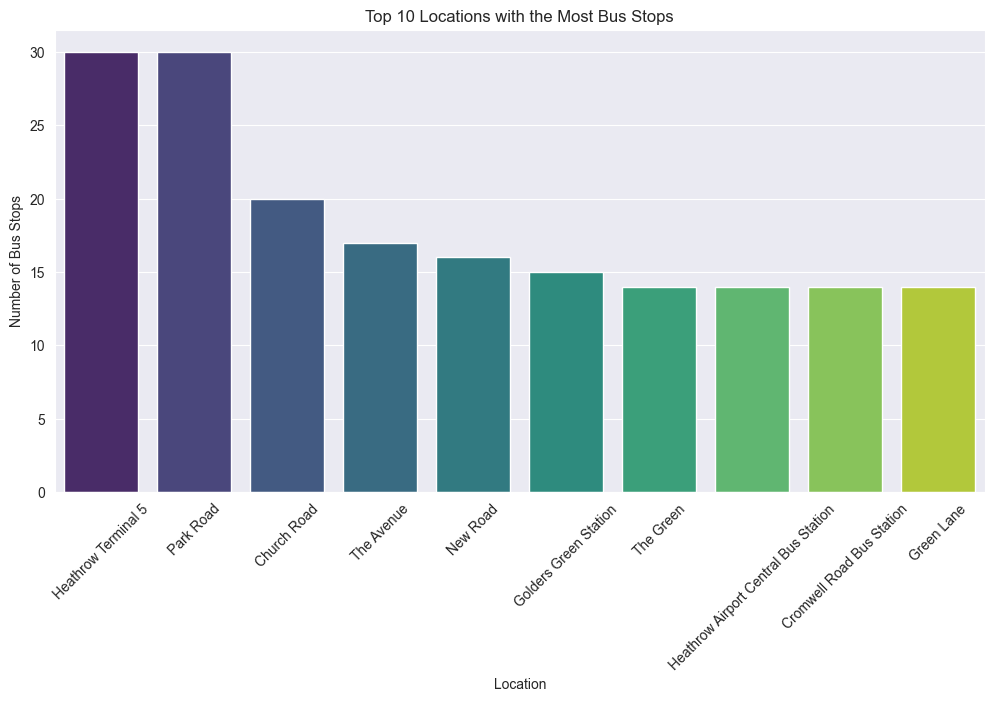

In [34]:
# Bar plot for the top 10 locations with the most bus stops
top_locations = bus_stop_gdf['name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
plt.title("Top 10 Locations with the Most Bus Stops")
plt.xlabel("Location")
plt.ylabel("Number of Bus Stops")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Map with bus stops
m = folium.Map(location=[51.5074, -0.1278], zoom_start=11)  # London coordinates

for index, row in bus_stop_gdf.iterrows():
    point = folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=row['name']
    )
    m.add_child(point)

In [36]:
# Add a measure control to the map for distance calculation
plugins.MeasureControl(primary_length_unit='kilometers').add_to(m)

In [37]:
# Display the map
#m #run this to view the map